In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [5]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

# Univariate Analysis

In [31]:
def univariateanalysis(column,bins):
    print('Description of', column)
    print(df[column].describe(), end= ' ' )
    print('\n')
    print('-----------------------')
    
    print('Distribution of', column)
    print(sns.distplot(df[column],kde= True))
    plt.show()
    print('\n')
    
    print('Boxplot of', column)
    print(sns.boxplot(df[column], color= 'r'))
    plt.show()

In [32]:
cols= df[['variance','skewness','curtosis','entropy']]

Description of variance
count    1372.000000
mean        0.433735
std         2.842763
min        -7.042100
25%        -1.773000
50%         0.496180
75%         2.821475
max         6.824800
Name: variance, dtype: float64 

-----------------------
Distribution of variance
AxesSubplot(0.125,0.125;0.775x0.755)


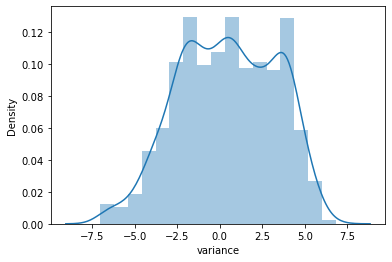



Boxplot of variance
AxesSubplot(0.125,0.125;0.775x0.755)


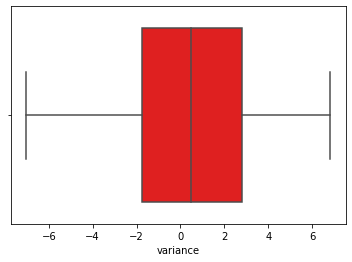

Description of skewness
count    1372.000000
mean        1.922353
std         5.869047
min       -13.773100
25%        -1.708200
50%         2.319650
75%         6.814625
max        12.951600
Name: skewness, dtype: float64 

-----------------------
Distribution of skewness
AxesSubplot(0.125,0.125;0.775x0.755)


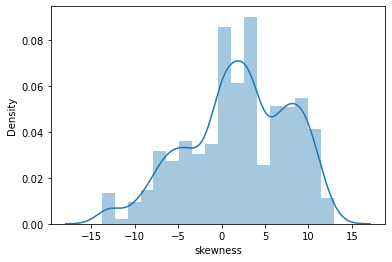



Boxplot of skewness
AxesSubplot(0.125,0.125;0.775x0.755)


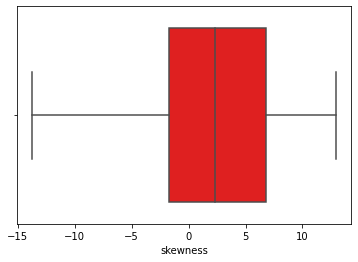

Description of curtosis
count    1372.000000
mean        1.397627
std         4.310030
min        -5.286100
25%        -1.574975
50%         0.616630
75%         3.179250
max        17.927400
Name: curtosis, dtype: float64 

-----------------------
Distribution of curtosis
AxesSubplot(0.125,0.125;0.775x0.755)


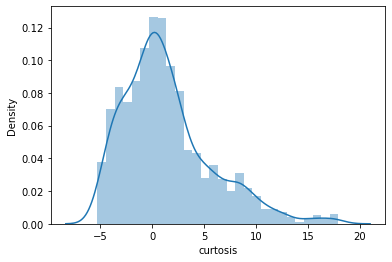



Boxplot of curtosis
AxesSubplot(0.125,0.125;0.775x0.755)


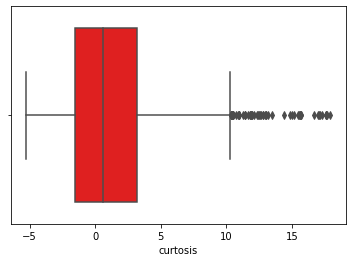

Description of entropy
count    1372.000000
mean       -1.191657
std         2.101013
min        -8.548200
25%        -2.413450
50%        -0.586650
75%         0.394810
max         2.449500
Name: entropy, dtype: float64 

-----------------------
Distribution of entropy
AxesSubplot(0.125,0.125;0.775x0.755)


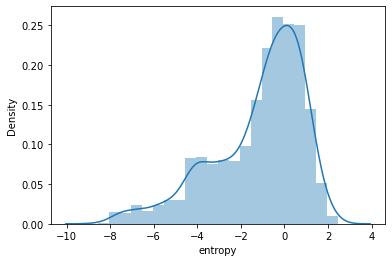



Boxplot of entropy
AxesSubplot(0.125,0.125;0.775x0.755)


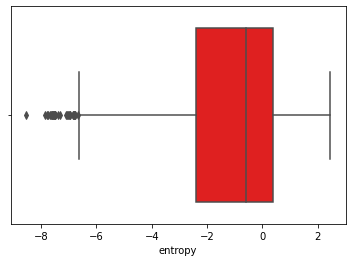

In [33]:
for x in cols:
    univariateanalysis(x,20)

In [86]:
#Insights of Univariate Analysis

#Variance- Variable is more left skewed reflected by the distplot as well as Median> mean. No outliers in the variable
#Skewness- Left skewed data, also median> mean. No outliers in the variable
#curtosis - Right skewed data and huge number of outliers are present too
#entropy- Left skewed data and huge number of outliers are present on the lower side of teh data too.


# Bivariate Analysis

## Analysis betweeen class and variance

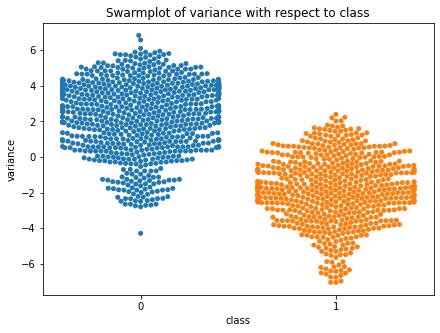

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,762.0,2.276686,2.019348,-4.2859,0.883345,2.5531,3.88445,6.8248
1,610.0,-1.868443,1.881183,-7.0421,-3.061450,-1.8061,-0.54177,2.3917


In [67]:
plt.figure(figsize=(7,5))
sns.swarmplot(x= df['class'], y= df['variance']);
plt.title('Swarmplot of variance with respect to class');
plt.show()

df['variance'].groupby(by= df['class']).describe()


#Insights
# Range of variance of forged Bank notes is unalike with the real bank notes.
#Forged notes lies in the range from -7.0421 to 2.3917 and real bank notes lies from -4.2859 to 6.8248
# Majority of real notes lies in the range from 0 to 4 while of Forged notes lies from -4 to 1

## Analysis betweeen class and skewness

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,762.0,4.256627,5.138792,-6.9321,0.450063,5.668800,8.691975,12.9516
1,610.0,-0.993576,5.404884,-13.7731,-5.810025,0.172775,3.189275,9.6014


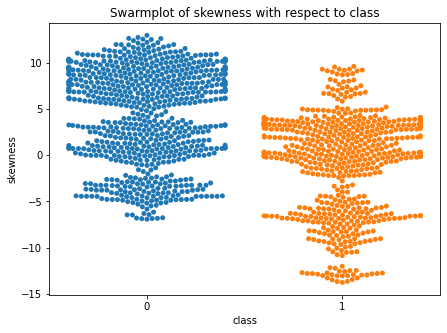

In [82]:
plt.figure(figsize=(7,5))
sns.swarmplot(x= df['class'], y= df['skewness']);
plt.title('Swarmplot of skewness with respect to class');

df['skewness'].groupby(by= df['class']).describe()


#Insights
#Forged notes lies in the range from -13.7731 to 9.6014 and real bank notes lies from -6.9321 to 12.9516
# In terms of real notes, approximately 50% of the notes have skewness above 5 while less than 25% of the forged notes have skewness above 5
# In real notes, only 25% of teh data have negative skewness and in forged notes, approximately 50% of the data have negative skewness
#This indicates that forged notes have more left skewed distribution than real notes

## Analysis betweeen class and curtosis

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,762.0,0.796718,3.239894,-4.9417,-1.7097,0.700605,2.652925,8.8294
1,610.0,2.148271,5.261811,-5.2861,-1.3575,0.373720,5.626350,17.9274


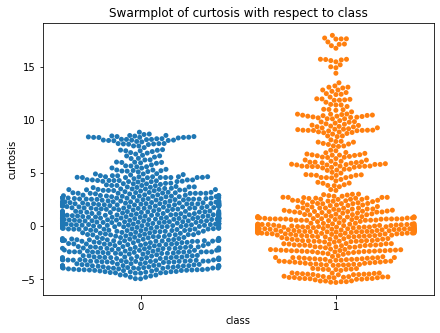

In [81]:
plt.figure(figsize=(7,5))
sns.swarmplot(x= df['class'], y= df['curtosis']);
plt.title('Swarmplot of curtosis with respect to class');

df['curtosis'].groupby(by= df['class']).describe()

#Insights
#Forged notes lies in the range from -5.2861 to 17.9274 and real bank notes lies from -4.9417 to 8.8294
#Distribution have forged notes is more right skewed as compared to real notes

## Analysis betweeen class and entropy

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,762.0,-1.147640,2.125077,-8.5482,-2.228250,-0.55238,0.423257,2.4495
1,610.0,-1.246641,2.070984,-7.5887,-2.458375,-0.66165,0.341790,2.1353


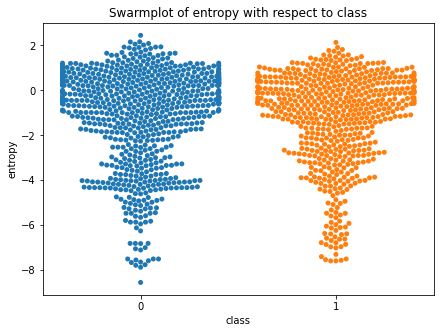

In [83]:
plt.figure(figsize=(7,5))
sns.swarmplot(x= df['class'], y= df['entropy']);
plt.title('Swarmplot of entropy with respect to class');

df['entropy'].groupby(by= df['class']).describe()

#In terms of entropy, distribution of real notes and forged notes is somewhat similar
#Forged notes lies in the range from -7.5887 to 2.1353 and real bank notes lies from -8.5482 to 2.4495

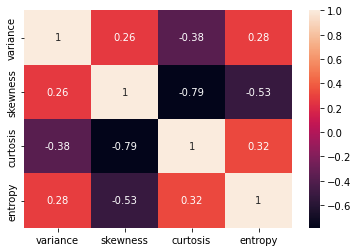

In [88]:
sns.heatmap (cols.corr(),annot= True);

#Insights

# High negative Correlation between skewness and curtosis
# Low negative Correlation between skewness and entropy
# Variance, skewness and entropy have positive but very low correlation.
#Curtosis is negatively correlaed with variance and skewness and is positively correlated with entropy.


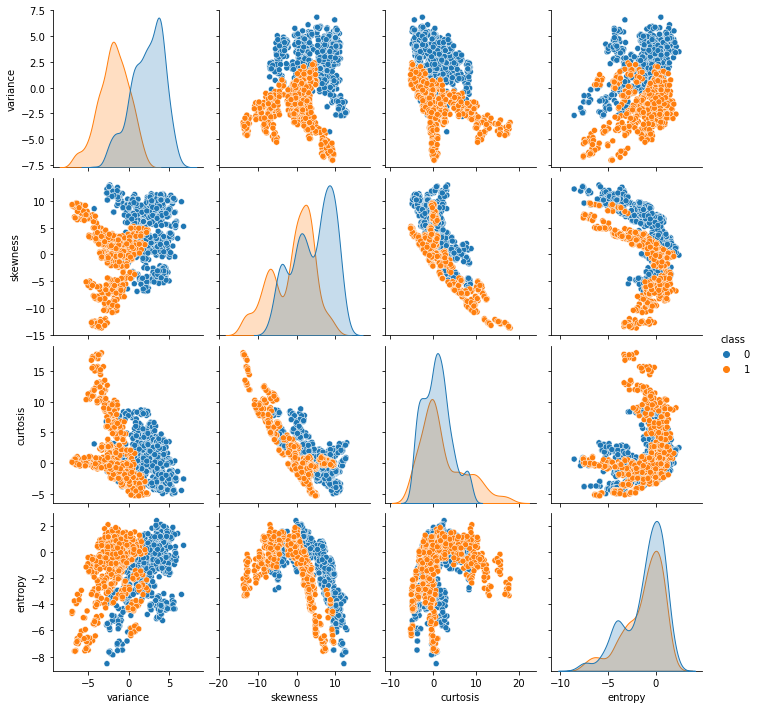

In [85]:
sns.pairplot(df, hue= 'class'); 

#In terms of variance and skewness, Distribution of forged notes is more shifted towards left than real notes and thus is more left skewed
#In terms of curtosis, Distribution of forged notes is more shifted towards right than real notes and thus is more right skewed
# Forged and Real notes are having somewhat similar distrbution in terms of entropy.

# Treating Outliers

In [145]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)

IQR= Q3-Q1

lower_range= Q1- (1.5*IQR)
upper_range= Q3+ (1.5*IQR)


In [146]:
upper_range

variance     9.713188
skewness    19.598862
curtosis    10.310588
entropy      4.276225
class        2.500000
dtype: float64

In [147]:
#Since outliers are present in upper side of the variable curtosis. Finding % of outliers present in the data
round((df[ df['curtosis'] > upper_range['curtosis']]['curtosis'].count()/df['curtosis'].count())*100,3)

0.0

In [148]:
#Since outliers are present in lower side of the variable entropy. Finding % of outliers present in the data
round((df[ df['entropy'] < lower_range['entropy']]['entropy'].count()/df['entropy'].count())*100,3)

1.312

In [149]:
round((df[ df['entropy'] > upper_range['entropy']]['entropy'].count()/df['entropy'].count())*100,3)

2.405

In [150]:
df[ df['entropy'] > upper_range['entropy']]['entropy'].count()

33

In [151]:
## Capping the outliers.

df['curtosis']= np.where(df['curtosis'] > upper_range['curtosis'], upper_range['curtosis'],df['curtosis'] )
df['entropy']= np.where(df['entropy'] < lower_range['entropy'], lower_range['entropy'],df['entropy'] )
df['entropy']= np.where(df['entropy'] > upper_range['entropy'], upper_range['entropy'],df['entropy'] )

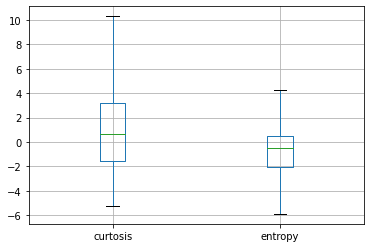

In [154]:
data_plot= df[['curtosis','entropy']]
data_plot.boxplot();

# Model Building

In [155]:
X= df.drop('class',axis=1)
Y= df.pop('class')

In [156]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size= 0.3, random_state=1)

In [157]:
classifier= RandomForestClassifier()
classifier= classifier.fit(X_train,Y_train)

In [158]:
y_pred= classifier.predict(X_test)

In [160]:
print(classifier.score(X_train,Y_train))
print(classifier.score(X_test,Y_test))

1.0
0.9951456310679612


In [161]:
## Creating a pickle file using serialization
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(classifier,pickle_out)
pickle_out.close()